In [ ]:
# 201500684 박종혁

In [ ]:
# 1. 관계 가시화

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

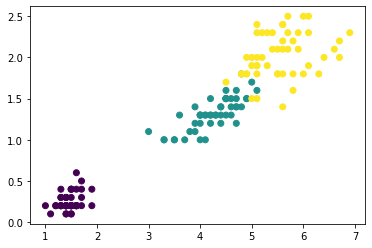

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
irisdf = pandas.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
irisdf['target'] = irisdf['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
irisdf.groupby(['target']).mean()

SL = irisdf.iloc[:,0]
SW = irisdf.iloc[:,1]
PL = irisdf.iloc[:,2]
PW = irisdf.iloc[:,3]

# 평균값으로 본 관계
# sepal length와 sepal width는 비례관계로 보이지 않는다.
# petal length와 petal width는 평균적으로 비례관계로 파악된다.

# 산점도 - 붓꽃의 데이터가 일관적으로 보인다.
plt.scatter(PL, PW, c=iris.target)
plt.show()

In [4]:
# 2. 평균 가시화

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<AxesSubplot:xlabel='target'>

<AxesSubplot:xlabel='target'>

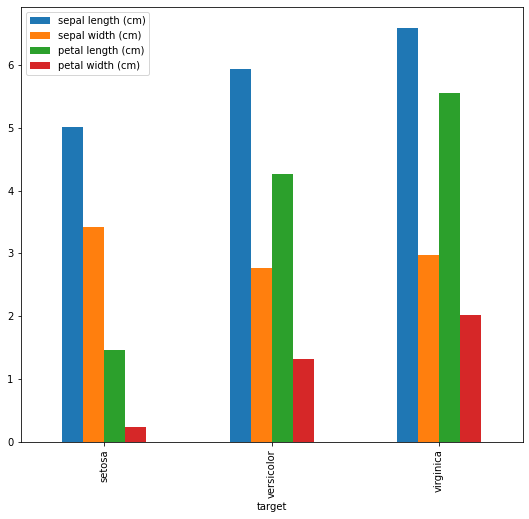

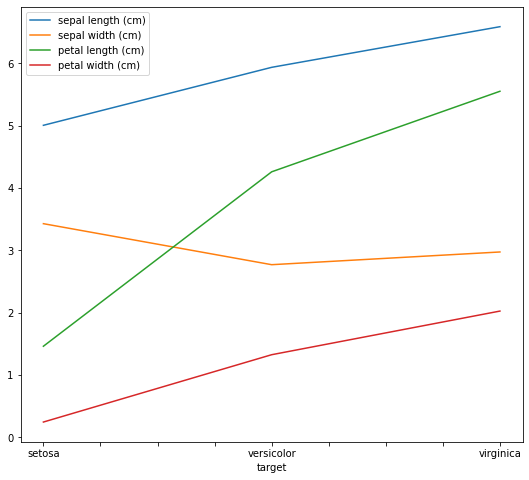

In [5]:
# 붓꽃 종류에 따른 평균값
df = irisdf.groupby(['target']).mean()
df

# 붓꽃의 종류에 따른 꽃받침과 꽃잎의 길이와 넓이 - 다양한 그래프
df.plot.bar(figsize=(9,8))
df.plot(figsize=(9,8))


target,setosa,versicolor,virginica
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


<AxesSubplot:>

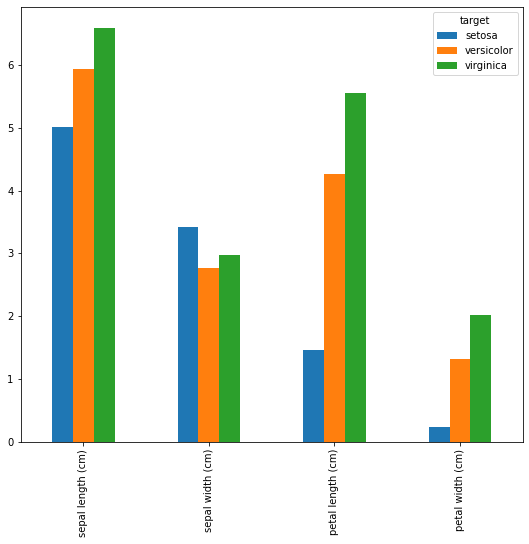

In [6]:
# 꽃받침과 꽃잎의 길이와 넓이에 따른 붓꽃 종류별 평균값
df2 = df.transpose()
df2
df2.plot.bar(figsize=(9,8))

<AxesSubplot:xlabel='target'>

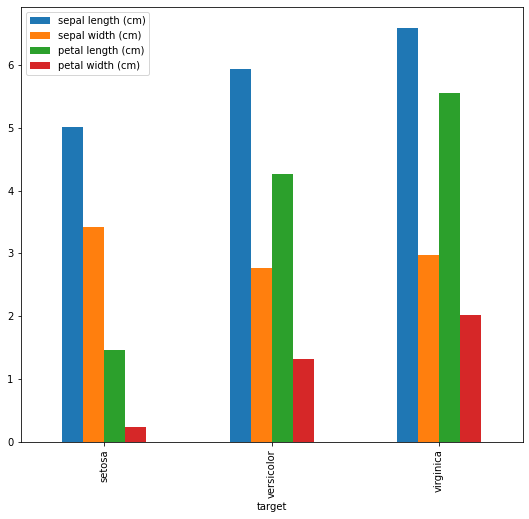

In [7]:
# 데이터의 특징을 가장 잘 나타애는 그래프는?
df.plot.bar(figsize=(9,8))

# 이유는?
# 붓꽃별 데이터를 비교하기도 좋고 각 특징들끼리 비교하기에도 가장 좋다.(비례관계를 파악하기에도 가장 간편함.)

In [ ]:
# 3. 데이터셋 분할

In [ ]:
# 3-1. sklearn 사용

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
import csv
InteractiveShell.ast_node_interactivity = "all"

# 총 150개의 데이터를 75(3/4):25(1/4) 비율로 나눈다.
train_set, test_set= train_test_split(irisdf, test_size=0.25)

train_set.to_csv("train_dataset.csv")
test_set.to_csv("test_dataset.csv")

In [111]:
# 4. 분활된 데이터셋 가시화

In [26]:
# test 읽어오기
test = pandas.read_csv("test_dataset.csv")

# Unnamed: 0 제거
test.drop(['Unnamed: 0'], axis = 1, inplace = True)
test.groupby(['target']).mean()

# train 읽어오기
train = pandas.read_csv("train_dataset.csv")

# Unnamed: 0 제거
train.drop(['Unnamed: 0'], axis = 1, inplace = True)
train.groupby(['target']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.046154,3.423077,1.515385,0.269231
versicolor,5.841176,2.747059,4.188235,1.311765
virginica,6.275000,2.850000,5.312500,1.937500


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,4.991892,3.429730,1.443243,0.237838
versicolor,5.984848,2.781818,4.296970,1.333333
virginica,6.647619,2.997619,5.597619,2.042857


<AxesSubplot:xlabel='target'>

<AxesSubplot:xlabel='target'>

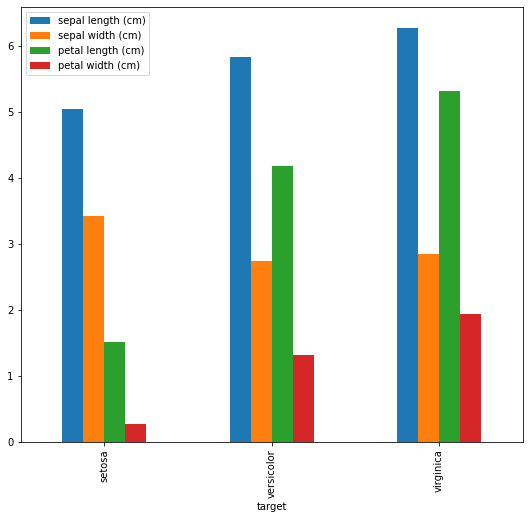

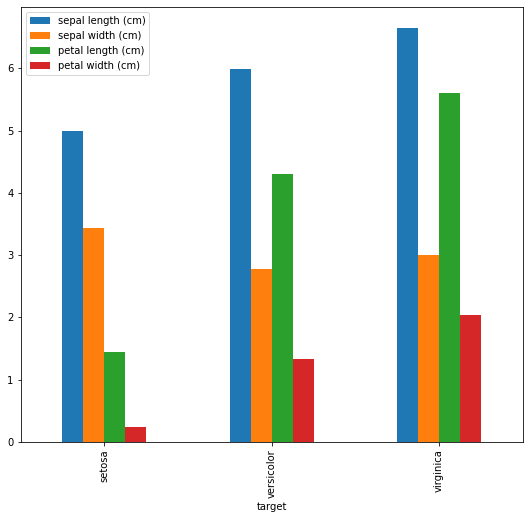

In [28]:
test.groupby(['target']).mean().plot.bar(figsize=(9,8))

train.groupby(['target']).mean().plot.bar(figsize=(9,8))

# test-set과 train-set의 그래프 형태가 거의 비슷한 것을 확인할 수 있다.

In [112]:
# 201500684 박종혁